Импорт библиотек

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import random

Задача 1. Дан набор из p матриц размерностью (n,n) и p векторов размерностью (n,1), найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(V[0])

    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)

    return result

In [21]:
p = random.randint(3, 10)
n = random.randint(3, 10)

random_matrix = [np.random.randint(0, 10, size=(n, n)) for i in range(p)]
random_vector = [np.random.randint(0, 10, size=n) for i in range(p)]

print(sum_prod(random_matrix, random_vector))

[ 788  643  814  710 1030  747  704  733]


In [31]:
matrix_test = np.array([np.array([[1, 2], [2, 2]]), np.array([[2, 3], [3, 3]])])
vector_test = np.array([np.array([2,2]), np.array([1,2])])
#[14 17]
print(sum_prod(matrix_test, vector_test))

[14 17]


Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [38]:
def binarize(M, threshold=0.5):
    M[M > threshold] = 1
    M[M <= threshold] = 0
    return M

In [41]:
matrix = np.random.randint(0,10, size=(3,3))
matrix = matrix * 0.1
print(matrix)
print(binarize(matrix))

[[0.7 0.3 0.7]
 [0.  0.2 0.8]
 [0.7 0.8 0.1]]
[[1. 0. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [42]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]

In [45]:
matrix = np.random.randint(0,10, size=(3,3))
print(matrix)
print(unique_rows(matrix))
print(unique_columns(matrix))

[[3 7 5]
 [5 5 6]
 [6 9 4]]
[array([3, 5, 7]), array([5, 6]), array([4, 6, 9])]
[array([3, 5, 6]), array([5, 7, 9]), array([4, 5, 6])]


Задача 4. Напишите функцию, которая заполняет матрицу с размерами
 случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [57]:
def matrix_info(m, n):
  matrix = np.random.normal(loc=0, scale=1, size=(m, n))

  means_rows = np.mean(matrix, axis=1)
  variances_rows = np.var(matrix, axis=1)

  means_columns = np.mean(matrix, axis=0)
  variances_columns = np.var(matrix, axis=0)

  print("Математическое ожидание для каждой строки:", means_rows)
  print("Дисперсия для каждой строки:", variances_rows)
  print("Математическое ожидание для каждого столбца:", means_columns)
  print("Дисперсия для каждого столбца:", variances_columns)

  # Построение гистограмм для строк
  for i in range(m):
      plt.figure()
      plt.hist(matrix[i], bins=10, alpha=0.7, color='blue' )
      plt.title(f'Гистограмма для строки {i+1}')
      plt.xlabel('Значения')
      plt.ylabel('Частота')
      plt.grid(True)
      plt.show()

  # Построение гистограмм для столбцов
  for j in range(n):
      plt.figure()
      plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green')
      plt.title(f'Гистограмма для столбца {j+1}')
      plt.xlabel('Значения')
      plt.ylabel('Частота')
      plt.grid(True)
      plt.show()

Математическое ожидание для каждой строки: [-0.35997085 -0.23052461  0.19602053  0.6448387  -0.09317778  0.37473689
 -0.10150763  0.12168472  0.49691519 -0.07719101]
Дисперсия для каждой строки: [0.30047254 1.51260789 0.46834212 0.27936438 0.79100936 1.17596617
 0.97257067 0.62019684 1.02265323 0.29944312]
Математическое ожидание для каждого столбца: [ 0.31800895  0.23486868 -0.12773707  0.20594953  0.14987413  0.3627772
 -0.19801547 -0.05162094  0.19720356 -0.1194844 ]
Дисперсия для каждого столбца: [0.61918351 0.50953771 0.69976408 0.25534472 0.57071469 2.21438941
 0.90752404 1.26912985 0.65293104 0.34403771]


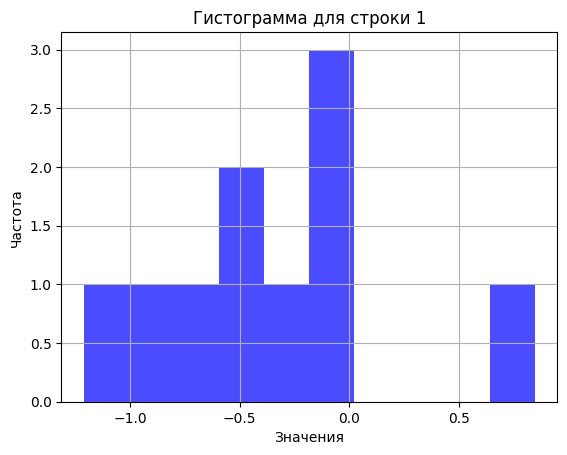

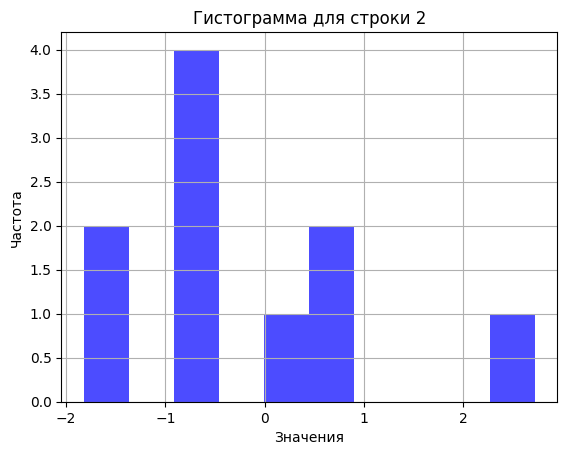

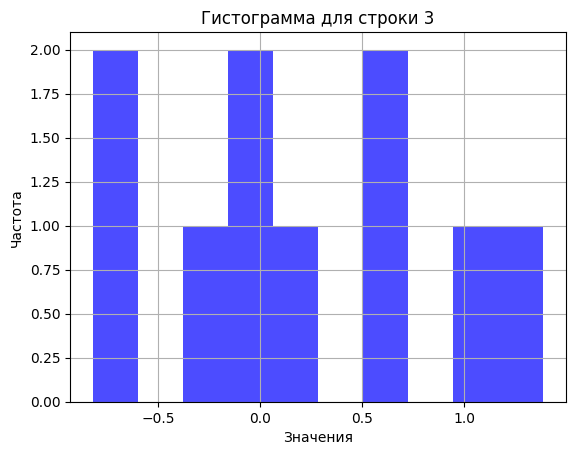

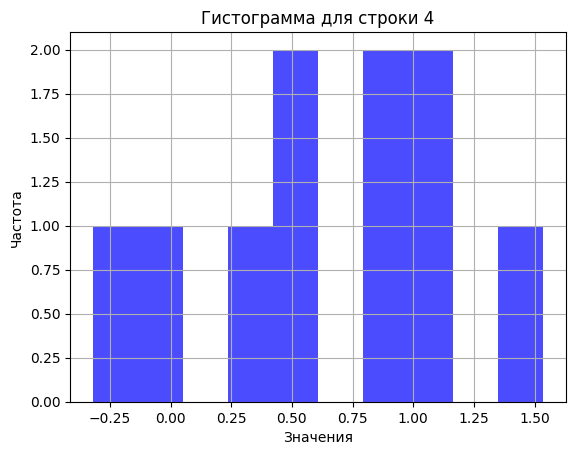

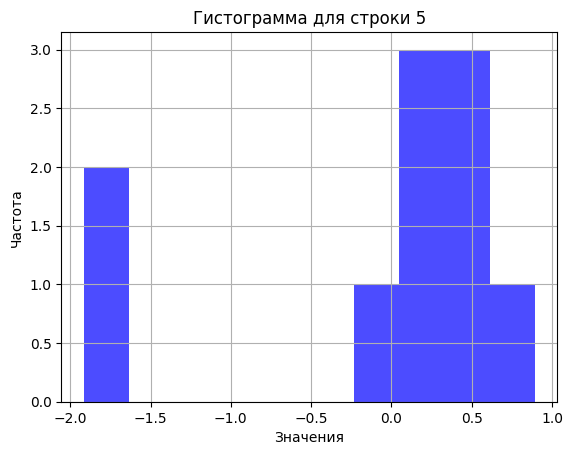

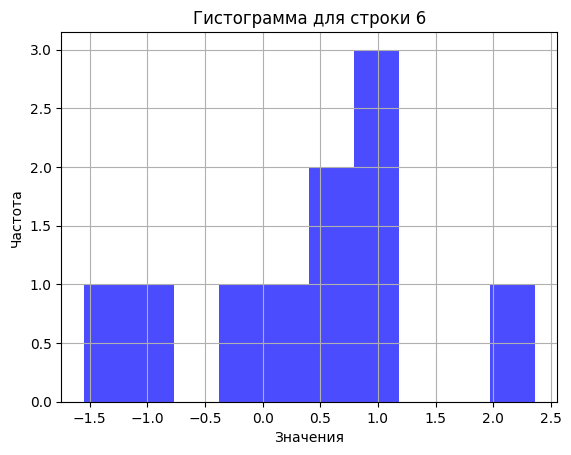

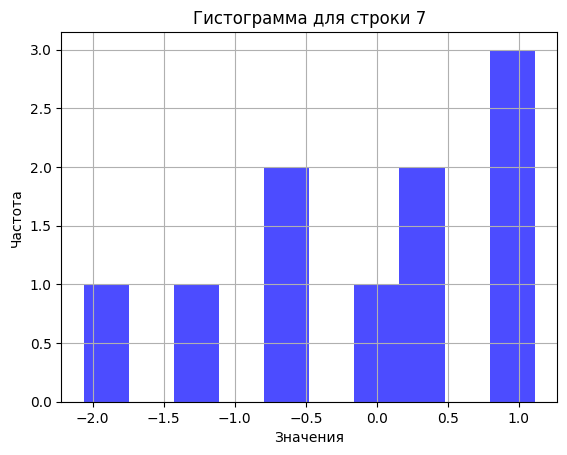

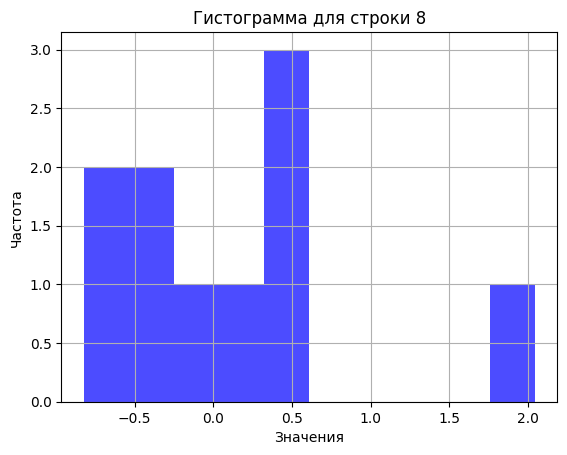

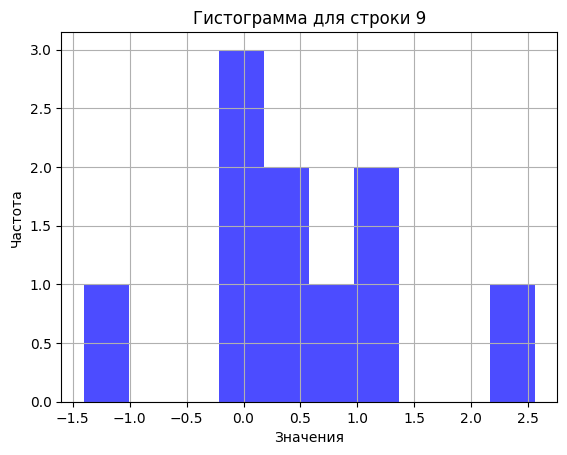

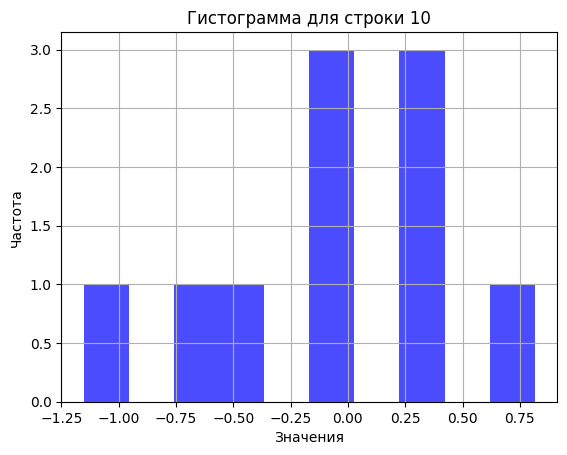

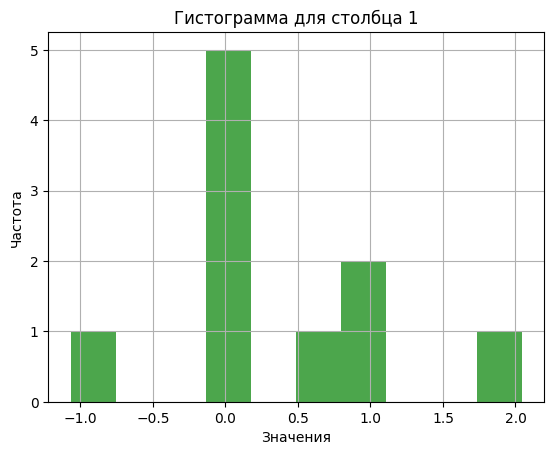

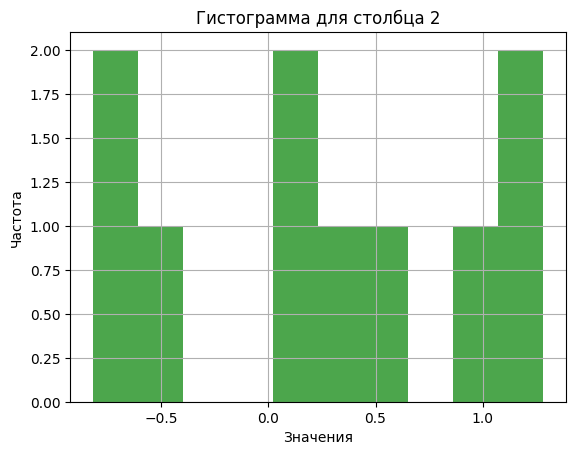

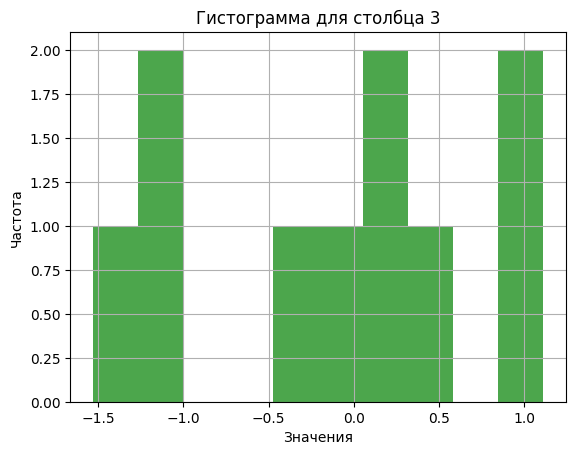

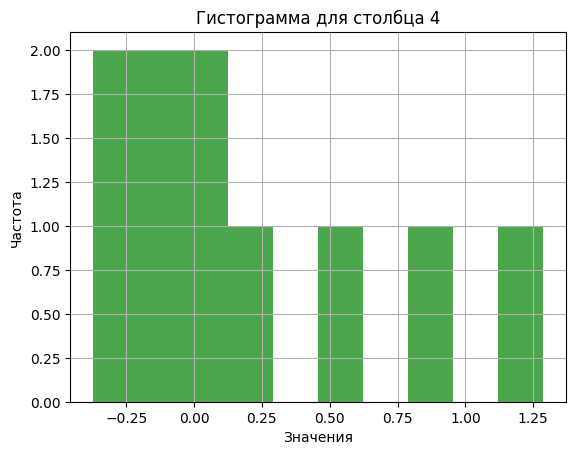

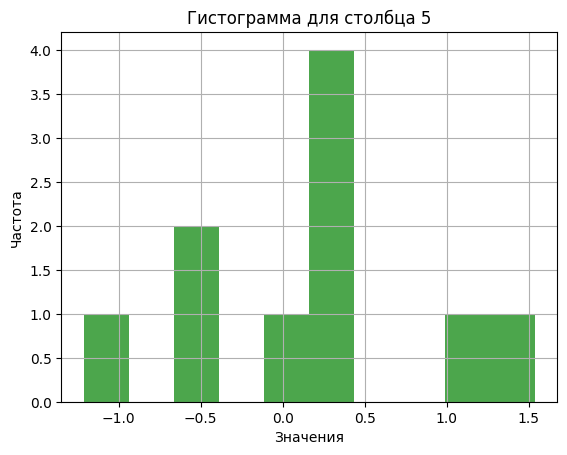

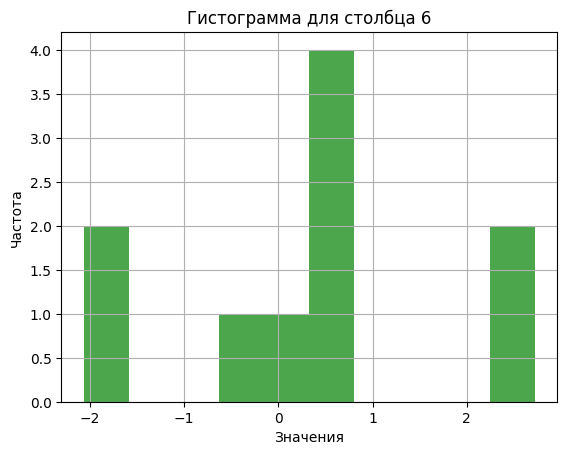

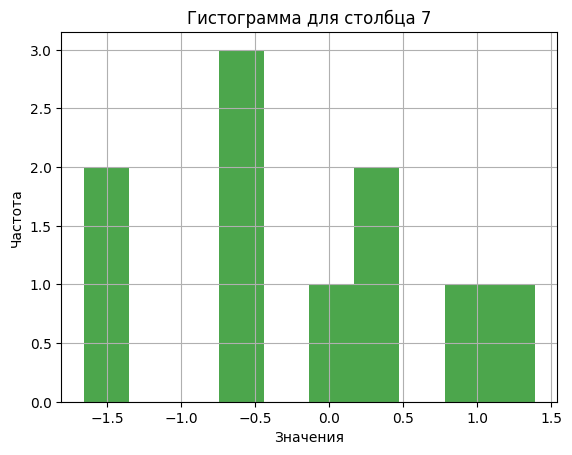

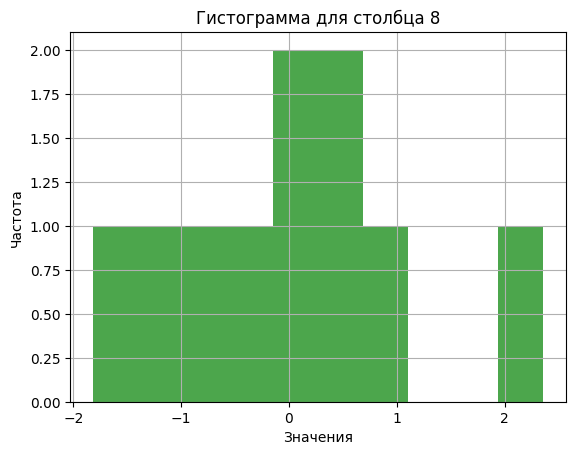

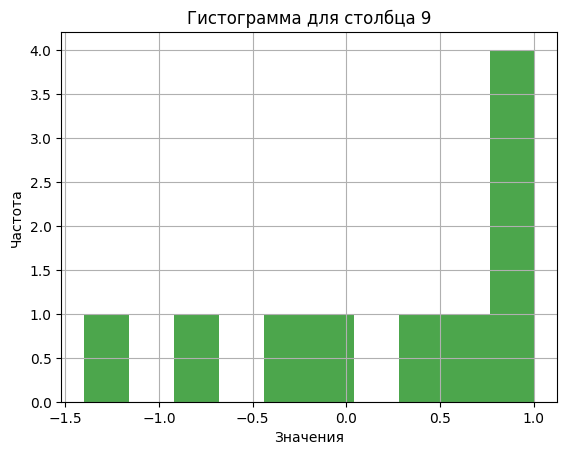

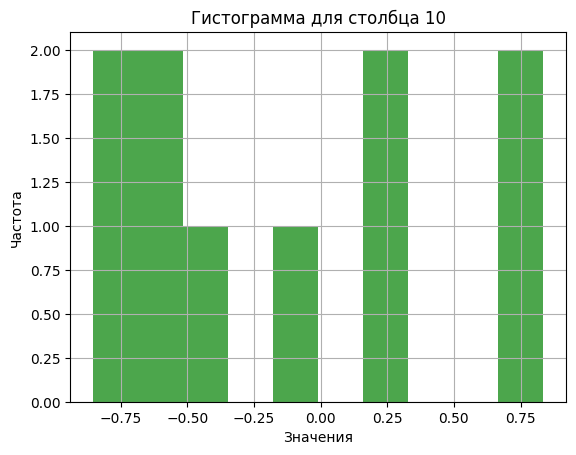

In [59]:
matrix_info(10, 10)

Задача 5. Напишите функцию, которая заполняет матрицу
 в шахматном порядке заданными числами
 и
. Напишите тесты для кода

In [89]:
def chess_matrix(m, n, a, b):
  matrix = np.zeros((m, n))

  matrix[0::2, 0::2] = a  # Задаем элементы на четных строках и четных столбцах
  matrix[1::2, 1::2] = a  # Задаем элементы на нечетных строках и нечетных столбцах
  matrix[0::2, 1::2] = b  # Задаем элементы на четных строках и нечетных столбцах
  matrix[1::2, 0::2] = b  # Задаем элементы на нечетных строках и четных столбцах

  return matrix

In [91]:
print(chess_matrix(5, 4, 4, 5))

[[4. 5. 4. 5.]
 [5. 4. 5. 4.]
 [4. 5. 4. 5.]
 [5. 4. 5. 4.]
 [4. 5. 4. 5.]]


Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [94]:
def one_hot_encode(labels):
    num_classes = np.max(labels) + 1

    one_hot_matrix = np.zeros((labels.size, num_classes), dtype=int)

    one_hot_matrix[np.arange(labels.size), labels] = 1

    return one_hot_matrix


In [99]:
vector = np.random.randint(0, 10, size=20)
print(vector)
print(one_hot_encode(vector))

[9 1 0 4 0 2 3 1 6 8 2 2 7 2 3 0 3 9 5 7]
[[0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]]
